In [1]:
import pyspedas
import pytplot

In [2]:
tr_temp = ['2017-03-29 01:30:00','2017-03-29 03:30:00']

from pyspedas.erg import  mgf
mgf(trange=tr_temp, datatype='64hz', coord='sgi')

04-Jun-23 16:17:57: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/64hz/2017/03/
04-Jun-23 16:18:03: File is current: erg_data/satellite/erg/mgf/l2/64hz/2017/03/erg_mgf_l2_64hz_sgi_2017032901_v03.04.cdf
04-Jun-23 16:18:03: File is current: erg_data/satellite/erg/mgf/l2/64hz/2017/03/erg_mgf_l2_64hz_sgi_2017032902_v03.04.cdf
04-Jun-23 16:18:03: File is current: erg_data/satellite/erg/mgf/l2/64hz/2017/03/erg_mgf_l2_64hz_sgi_2017032903_v03.04.cdf
04-Jun-23 16:18:03: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

04-Jun-23 16:18:03: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, b

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 64 Hz resolution magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_mgf_l2_epoch_64hz',
 'erg_mgf_l2_date_time_64hz',
 'erg_mgf_l2_mag_64hz_sgi',
 'erg_mgf_l2_dyn_rng_64hz',
 'erg_mgf_l2_quality_64hz',
 'erg_mgf_l2_quality_64hz_gc',
 'erg_mgf_l2_spin_phase_64hz',
 'erg_mgf_l2_ti_64hz']

In [3]:
pytplot.cdf_to_tplot('./erg_data/satellite/erg/pwe/ofa/l2/matrix/sgi/2017/03/erg_pwe_ofa_l2_matrix_sgi_20170329_v01_03.cdf')

04-Jun-23 16:18:06: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

04-Jun-23 16:18:06: Conflicting size for at least one dimension for variable Ex_Ex_132
04-Jun-23 16:18:06: Could not create coordinate v1_dim for variable Ex_Ex_132
04-Jun-23 16:18:06: Could not create coordinate v2_dim for variable Ex_Ex_132
04-Jun-23 16:18:06: Ex_Ex_132 does not contain coordinates for spectrogram plotting.  Continuing...
04-Jun-23 16:18:06: Conflicting size for at least one dimension for variable Ey_Ey_132
04-Jun-23 16:18:06: Could not create coordinate v1_dim for variable Ey_Ey_132
04-Jun-23 16:18:06: Could not create coordinate v2_dim for variable Ey_Ey_132
04-Jun-23 16:18:06: Ey_Ey_132 does not contain coordinates for spectrogram plotting.  Continuing...
04

['epoch_e132',
 'Ex_Ex_132',
 'Ey_Ey_132',
 'Ex_Ey_132',
 'Ey_Ex_132',
 'Etotal_132',
 'quality_flag_e132',
 'epoch_b132',
 'Bx_Bx_132',
 'By_By_132',
 'Bz_Bz_132',
 'Bx_By_132',
 'Bx_Bz_132',
 'By_Bx_132',
 'By_Bz_132',
 'Bz_Bx_132',
 'Bz_By_132',
 'Btotal_132',
 'quality_flag_b132']

In [4]:
pyspedas.tinterpol('erg_mgf_l2_mag_64hz_sgi', 'Ex_Ex_132', newname='erg_mgf_l2_mag_64hz_sgi_interp')


04-Jun-23 16:18:07: tinterpol (linear) was applied to: erg_mgf_l2_mag_64hz_sgi_interp


In [5]:
bvec = pytplot.data_quants['erg_mgf_l2_mag_64hz_sgi_interp']

In [6]:
tmpxx = pytplot.data_quants['Ex_Ex_132']
Exx = tmpxx[:, :, 0] + 1j * tmpxx[:, :, 1]

tmpxy = pytplot.data_quants['Ex_Ey_132']
Exy = tmpxy[:, :, 0] + 1j * tmpxy[:, :, 1]

tmpyy = pytplot.data_quants['Ey_Ey_132']
Eyy = tmpyy[:, :, 0] + 1j * tmpyy[:, :, 1]

tmpyx = pytplot.data_quants['Ey_Ex_132']
Eyx = tmpyx[:, :, 0] + 1j * tmpyx[:, :, 1]


In [7]:
import numpy as np
smat = np.zeros((len(tmpxx['time']), len(tmpxx['v1_dim']),3,3))

In [8]:
smat2 = smat

In [9]:
smat[:, :, 0, 0] = Exx
smat[:, :, 1, 0] = Exy
smat[:, :, 2, 0] = 0.0
smat[:, :, 0, 1] = Eyx
smat[:, :, 1, 1] = Eyy
smat[:, :, 1, 2] = 0.0
smat[:, :, 2, 0:2] = 0.0

04-Jun-23 16:18:07: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/xarray/core/common.py:163: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self.values, dtype=dtype)



In [10]:
phi = np.arctan2(bvec[:, 1], bvec[:, 0])

In [11]:
""" import numpy as np
import numpy as np

def arctan2_cos(y, x):
    radius = np.sqrt(x**2 + y**2)
    angle = np.arccos(x / radius)

    # Adjust angle based on quadrant
    angle = np.where(y >= 0, angle, angle)
    angle = np.where((y < 0), -1*angle, angle)
    angle = np.where((x < 0) & (y == 0), np.pi, angle)
    angle = np.where((x > 0) & (y == 0), 2*np.pi - angle, angle)

    return angle

# テストデータ
x = np.array([1, -1, -1, 1])
y = np.array([1, 1, -1, -1])

# arctan2と同様の結果を得る
result = arctan2_cos(y, x)
print(result)

phi = arctan2_cos(bvec[:, 1], bvec[:, 0]) """


' import numpy as np\nimport numpy as np\n\ndef arctan2_cos(y, x):\n    radius = np.sqrt(x**2 + y**2)\n    angle = np.arccos(x / radius)\n\n    # Adjust angle based on quadrant\n    angle = np.where(y >= 0, angle, angle)\n    angle = np.where((y < 0), -1*angle, angle)\n    angle = np.where((x < 0) & (y == 0), np.pi, angle)\n    angle = np.where((x > 0) & (y == 0), 2*np.pi - angle, angle)\n\n    return angle\n\n# テストデータ\nx = np.array([1, -1, -1, 1])\ny = np.array([1, 1, -1, -1])\n\n# arctan2と同様の結果を得る\nresult = arctan2_cos(y, x)\nprint(result)\n\nphi = arctan2_cos(bvec[:, 1], bvec[:, 0]) '

In [12]:
rotmat = np.zeros((len(tmpxx['time']), 3, 3))
rotmat[:, 0, 0] = np.cos(phi)
rotmat[:, 1, 0] = np.sin(phi)
rotmat[:, 0, 1] = -np.sin(phi)
rotmat[:, 1, 1] = np.cos(phi)
rotmat[:, 2, 2] = 1.0

In [13]:
for ii in range(len(tmpxx['time'])):  # loop for time
    for jj in range(len(tmpxx['v1_dim'])):  # loop for frequency
        # rotation of spectral matrix
        smat2[ii, jj, :, :] = np.dot(rotmat[ii, :, :], np.dot(smat[ii, jj, :, :], rotmat[ii, :, :].T))


In [14]:
b0para = bvec[:, 0] * np.cos(phi) + bvec[:, 1] * np.sin(phi)
b0perp = -1.0 * bvec[:, 0] * np.sin(phi) + bvec[:, 1] * np.cos(phi)


In [15]:
pytplot.store_data('Eperp_proj', data={'x': tmpxx['time'], 'y': np.float64(smat2[:,:,1,1]), 'v': tmpxx['v1_dim']})
pytplot.store_data('Epara_proj', data={'x': tmpxx['time'], 'y': np.float64(smat2[:,:,0,0]), 'v': tmpxx['v1_dim']})
pytplot.store_data('Eperp_Epara_ratio', data={'x': tmpxx['time'], 'y': np.float64(smat2[:,:,0,0]/smat2[:,:,1,1]), 'v': tmpxx['v1_dim']})
pytplot.store_data('B0_perp', data={'x': bvec['time'], 'y': b0perp})
pytplot.store_data('B0_para', data={'x': bvec['time'], 'y': b0para})
pytplot.store_data('sgixy_phi', data={'x': tmpxx['time'], 'y': phi/np.pi*180.0})


True

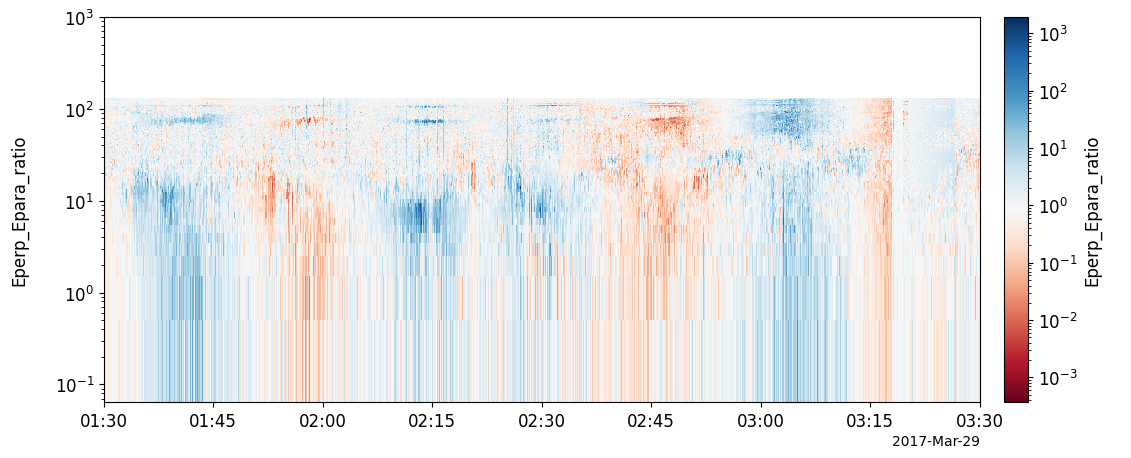

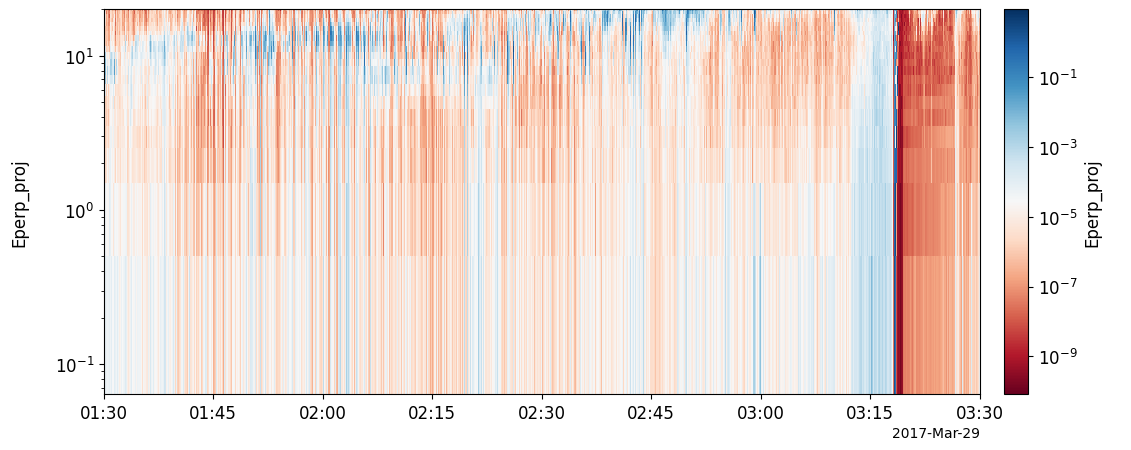

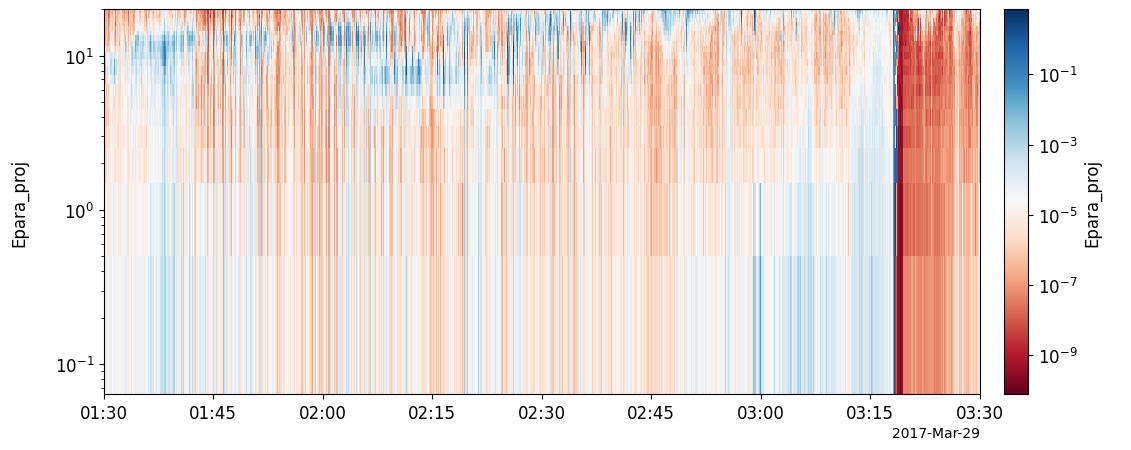

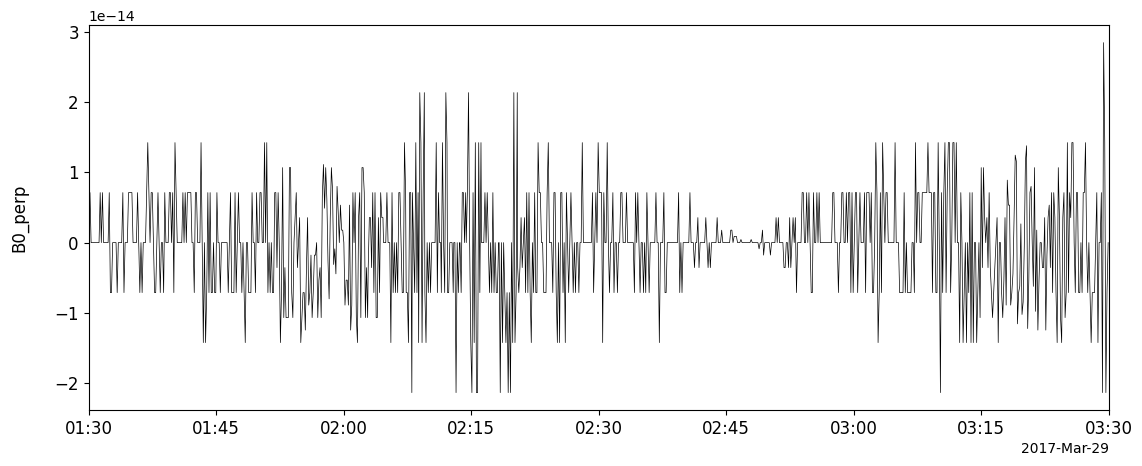

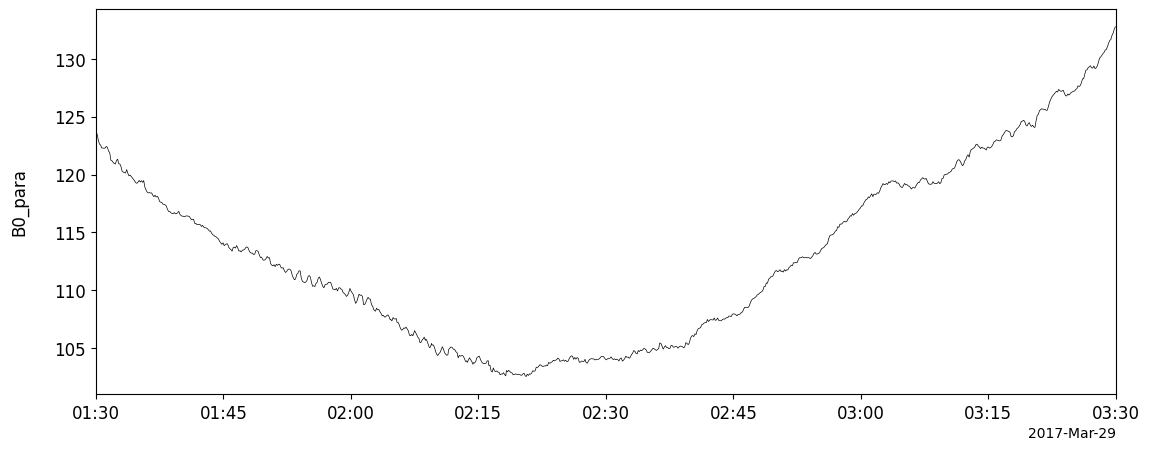

In [18]:
pytplot.options('Eperp_proj', opt_dict={'spec':1, 'ylog':1, 'zlog':1,'yrange':[0.064, 20],'Colormap':'RdBu'})
pytplot.options('Epara_proj', opt_dict={'spec':1, 'ylog':1, 'zlog':1,'yrange':[0.064, 20],'Colormap':'RdBu'})
pytplot.options('Eperp_Epara_ratio', opt_dict={'spec':1, 'ylog':1, 'zlog':1,'yrange':[0.064, 1000],'Colormap':'RdBu'})
pytplot.xlim('2017-03-29 01:30:00','2017-03-29 03:30:00')
pytplot.tplot('Eperp_Epara_ratio')
pytplot.tplot('Eperp_proj')
pytplot.tplot('Epara_proj')
pytplot.tplot('B0_perp')
pytplot.tplot('B0_para')




In [17]:
pytplot.store_data = {
    'Eperp_proj': {'x': tmp['time'], 'y': np.float64(smat2[:, :, 1, 1]), 'v': tmp['v1_dim']},
    'Epara_proj': {'x': tmp['time'], 'y': np.float64(smat2[:, :, 0, 0]), 'v': tmp['v1_dim']},
    'Eperp_Epara_ratio': {'x': tmp['time'], 'y': np.float64(smat2[:, :, 0, 0] / smat2[:, :, 1, 1]), 'v': tmp['v1_dim']},
    'B0_perp': {'x': bvec['time'], 'y': np.array([b0perp])},
    'B0_para': {'x': bvec['time'], 'y': np.array([b0para])},
    'sgixy_phi': {'x': tmp['time'], 'y': phi / np.pi * 180.0}
}


NameError: name 'tmp' is not defined

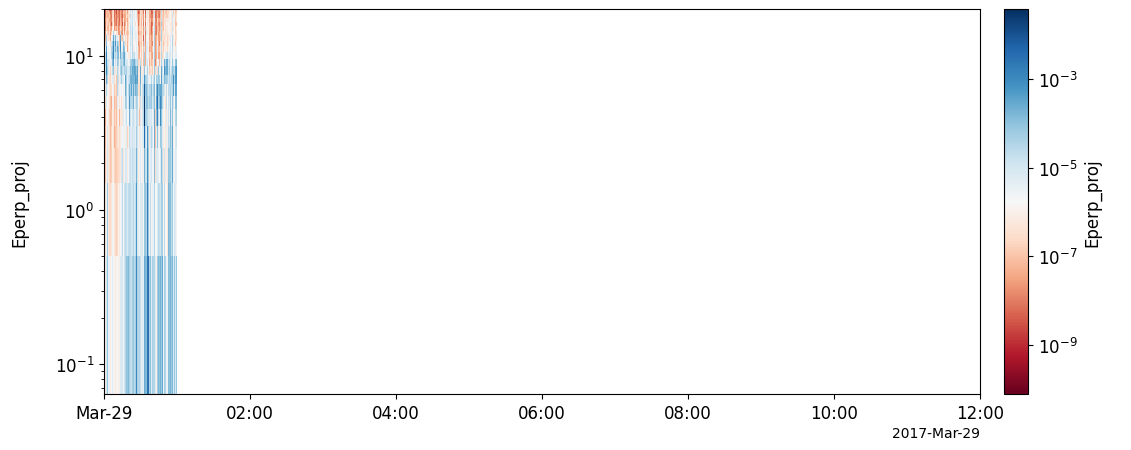

In [ ]:
pytplot.tplot('Eperp_proj')

In [ ]:
import numpy as np

# Rotate MGF magnetic field vector for check
# If rotation is successful, b0perp should be always very close to zero,
# and b0para dominates
b0para = bvec.y[:, 0] * np.cos(phi) + bvec.y[:, 1] * np.sin(phi)
b0perp = -1.0 * bvec.y[:, 0] * np.sin(phi) + bvec.y[:, 1] * np.cos(phi)

# Storing data into tplot variables
tplot_data = {
    'Eperp_proj': {'x': tmp.x, 'y': np.float64(smat2[:, :, 1, 1]), 'v': tmp.v2},
    'Epara_proj': {'x': tmp.x, 'y': np.float64(smat2[:, :, 0, 0]), 'v': tmp.v2},
    'Eperp_Epara_ratio': {'x': tmp.x, 'y': np.float64(smat2[:, :, 0, 0] / smat2[:, :, 1, 1]), 'v': tmp.v2},
    'B0_perp': {'x': bvec.x, 'y': np.array([b0perp])},
    'B0_para': {'x': bvec.x, 'y': np.array([b0para])},
    'sgixy_phi': {'x': tmp.x, 'y': phi / np.pi * 180.0}
}

for var_name, var_data in tplot_data.items():
    store_data(var_name, data=var_data, dlim={'spec': 1, 'ylog': 1, 'zlog': 1})

if size_tmp != 8:
    dprint('No valid electric field waveforms are available.')


AttributeError: 'DataArray' object has no attribute 'y'